# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("data/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 1595

#### Question 2. Create a summary table

In [19]:
def make_summary(df):
    print df.describe()

In [20]:
make_summary(df_raw)

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of GRE is larger than that of GPA, which means its standard deviation must be at least as large as that of GRE.

#### Question 4. Drop data points with missing data


In [80]:
df_nonans = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We can use `.isnull()` to create another dataframe of the same size and shape as our original, except with boolean values signifying whether a given datum in our original dataframe was `nan`, and then iterate over it.

In [81]:
df_raw.isnull().values.any()

True

In [82]:
df_nonans.isnull().values.any()

False

#### Question 6. Create box plots for GRE and GPA

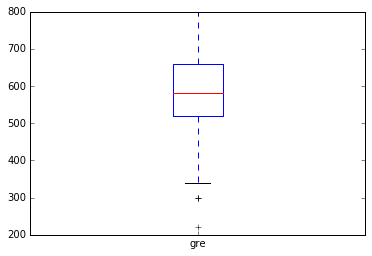

In [83]:
df_nonans['gre'].plot(kind='box')

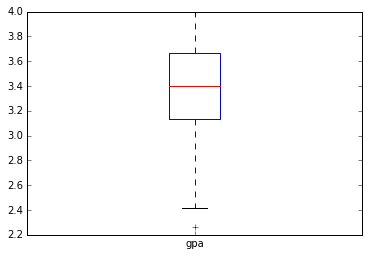

In [84]:
df_nonans['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: There is significant variation in each variable, and neither are normally distributed.

#### Question 8. Describe each distribution 

In [70]:
def describe_dist(s):
    s.plot(kind='hist')
    return s.mean() == s.median() == s.mode()

False

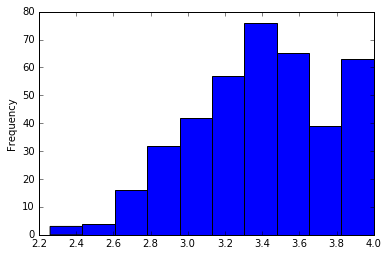

In [72]:
describe_dist(df_nonans)

False

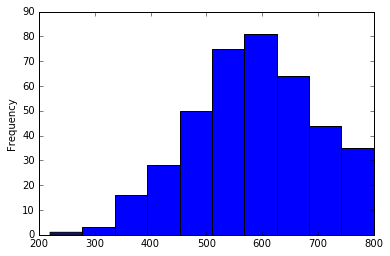

In [71]:
describe_dist(df_nonans['gre'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, since `mean != median != mode`

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No.

#### Question 11. Which of our variables are potentially colinear? 

In [73]:
# create a correlation matrix for the data
df_nonans.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


#### Question 12. What did you find?

Answer: GRE and GPA are strongly correlated.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Locate groups of data where GPA and GRE are "close enough," as defined by `abs(val1 - val2) <= e`, where `val1` and `val2` are two observations of GRE or GPA, and `e` is some acceptably low value, and then calculate correlation between prestige and admission within those groups.

#### Question 14. What is your hypothesis? 

Answer: Prestige is relatively unimportant in the admission decision.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [122]:
df_meansna = df_raw.fillna(df_raw.mean())
df_meansna.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [118]:
df_meansna.isnull().values.any()

False

#### 2. Bonus: Log transform the skewed data

In [124]:
df_meansna['gre'] = df_meansna['gre'].apply(np.log)
df_meansna['gpa'] = df_meansna['gpa'].apply(np.log)

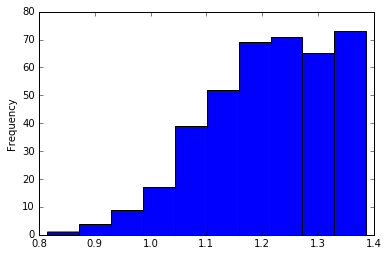

In [126]:
df_meansna['gpa'].plot(kind='hist')

#### 3. Advanced: Impute missing data

In [127]:
df_interp = df_raw.fillna(df_raw.interpolate())

In [128]:
df_interp.isnull().values.any()

False

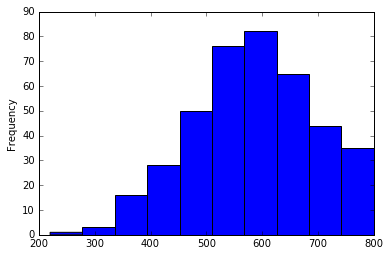

In [130]:
df_interp['gre'].plot(kind='hist')